In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Load network traffic data from CSV into DataFrame
df = pd.read_csv("C:/Users/cs123/Downloads/archive/dataset.csv")

# Convert IP addresses to integers
def ip_to_int(ip_series):
    return ip_series.apply(lambda ip: sum(int(ip_part) * 256 ** i for i, ip_part in enumerate(reversed(ip.split('.')))))

df['Source.IP'] = ip_to_int(df['Source.IP'])
df['Destination.IP'] = ip_to_int(df['Destination.IP'])

# Prepare features (X) and target variable (y) for the model
X = df[['Source.IP', 'Destination.IP', 'Protocol', 'Total.Fwd.Packets', 'Total.Backward.Packets', 
        'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets', 'Flow.Bytes.s', 'Flow.Packets.s',
        'Average.Packet.Size','Protocol','L7Protocol']]

y = df['ProtocolName']

# Initialize a RandomForestClassifier model
model = RandomForestClassifier()

# Fit the model on the data
model.fit(X, y)

RandomForestClassifier()

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate model using cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# Fit model on training data
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Evaluate predictions
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Save the trained model
import joblib
joblib.dump(model, 'traffic_classifier_model.pkl')

c:\Users\cs123\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Scores: [0.99890455 0.99902161 0.99908974 0.9991142  0.99906878]
Mean CV Accuracy: 0.9990397773091214
Classification Report:


c:\Users\cs123\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\cs123\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\cs123\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

                   precision    recall  f1-score   support

           AMAZON       1.00      1.00      1.00     17214
            APPLE       0.99      0.99      0.99      1529
     APPLE_ICLOUD       0.92      0.94      0.93       205
     APPLE_ITUNES       0.97      0.90      0.94       219
              BGP       0.00      0.00      0.00         1
       BITTORRENT       0.00      0.00      0.00         1
           CITRIX       1.00      0.50      0.67         2
    CITRIX_ONLINE       1.00      1.00      1.00         8
       CLOUDFLARE       1.00      1.00      1.00      2985
              CNN       0.00      0.00      0.00         1
    CONTENT_FLASH       1.00      1.00      1.00      1677
           DEEZER       1.00      0.58      0.74        12
              DNS       1.00      1.00      1.00       304
          DROPBOX       1.00      0.99      0.99      5054
         EASYTAXI       0.99      0.83      0.90       166
             EBAY       0.97      0.93      0.95       

['traffic_classifier_model.pkl']

In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import warnings

# Load network traffic data from CSV into DataFrame
df = pd.read_csv("C:/Users/cs123/Downloads/archive/dataset.csv")

# Convert IP addresses to integers
def ip_to_int(ip_series):
    return ip_series.apply(lambda ip: sum(int(ip_part) * 256 ** i for i, ip_part in enumerate(reversed(ip.split('.')))))

df['Source.IP'] = ip_to_int(df['Source.IP'])
df['Destination.IP'] = ip_to_int(df['Destination.IP'])

# Prepare features (X) and target variable (y) for the model
X = df[['Source.IP', 'Destination.IP', 'Protocol', 'Total.Fwd.Packets', 'Total.Backward.Packets', 
        'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets', 'Flow.Bytes.s', 'Flow.Packets.s',
        'Average.Packet.Size', 'Protocol', 'L7Protocol']]
y = df['ProtocolName']

# Remove classes with very few samples
min_samples = 2
class_counts = y.value_counts()
valid_classes = class_counts[class_counts >= min_samples].index
df_filtered = df[df['ProtocolName'].isin(valid_classes)]

X_filtered = df_filtered[['Source.IP', 'Destination.IP', 'Protocol', 'Total.Fwd.Packets', 'Total.Backward.Packets', 
                          'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets', 'Flow.Bytes.s', 'Flow.Packets.s',
                          'Average.Packet.Size', 'Protocol', 'L7Protocol']]
y_filtered = df_filtered['ProtocolName']

# Split data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42, stratify=y_filtered)

# Initialize a RandomForestClassifier model
model = RandomForestClassifier()

# Evaluate model using stratified cross-validation
cv = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(model, X_train, y_train, cv=cv)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# Fit model on training data
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Evaluate predictions
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Save the trained model
joblib.dump(model, 'traffic_classifier_model.pkl')


c:\Users\cs123\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Scores: [0.99903034 0.99900414 0.99915264 0.99905655 0.99912643]
Mean CV Accuracy: 0.9990740203842755
Classification Report:
                   precision    recall  f1-score   support

           AMAZON       1.00      1.00      1.00     17375
            APPLE       0.99      0.99      0.99      1523
     APPLE_ICLOUD       0.99      0.96      0.97       240
     APPLE_ITUNES       0.98      0.94      0.96       257
              BGP       0.00      0.00      0.00         2
       BITTORRENT       0.00      0.00      0.00         2
           CITRIX       1.00      0.33      0.50         3
    CITRIX_ONLINE       1.00      1.00      1.00         8
       CLOUDFLARE       1.00      1.00      1.00      2947
              CNN       1.00      0.25      0.40         4
    CONTENT_FLASH       1.00      1.00      1.00      1718
           DEEZER       0.82      0.60      0.69        15
              DNS       1.00      1.00      1.00       339
          DROPBOX       1.00   

['traffic_classifier_model.pkl']

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each traffic category
traffic_counts = df["ProtocolName"].value_counts()

# Plot the graph
plt.figure(figsize=(30, 5))
sns.barplot(x=traffic_counts.index, y=traffic_counts.values, palette='viridis')
plt.title("Number of Protocols Detected in the Dataset")
plt.xlabel("Traffic Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

----------

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
model = joblib.load('traffic_classifier_model.pkl')
data = pd.read_csv("C:/Users/cs123/Downloads/archive/dataset.csv")

In [3]:
def ip_to_int(ip_series):
    return ip_series.apply(lambda ip: sum(int(ip_part) * 256 ** i for i, ip_part in enumerate(reversed(ip.split('.')))))

data['Source.IP'] = ip_to_int(data['Source.IP'])
data['Destination.IP'] = ip_to_int(data['Destination.IP'])


In [4]:
X = data[['Source.IP', 'Destination.IP', 'Protocol', 'Total.Fwd.Packets', 'Total.Backward.Packets', 
        'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets', 'Flow.Bytes.s', 'Flow.Packets.s',
        'Average.Packet.Size', 'Protocol', 'L7Protocol']]
y = data['ProtocolName']

#Split the data: 75% training and 25% testing#
random_state = np.random.randint(1, 10000)  # Randomly choose a seed between 1 and 10000
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0005, random_state=random_state, shuffle=True)

# Verifying the split
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Testing set size: {X_test.shape[0]} samples')
print(f'Random state used: {random_state}')

Training set size: 3575507 samples
Testing set size: 1789 samples
Random state used: 2841


In [5]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Confusion matrix
cm = confusion_matrix(y_test, predictions)
print(f"Confusion Matrix:\n{cm}")

# Classification report
report = classification_report(y_test, predictions)
print(f"Classification Report:\n{report}")


Accuracy: 0.9988820570150923
Confusion Matrix:
[[ 43   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   8   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  10   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  13   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  19   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   

In [6]:
# List all protocols found during testing
protocols_to_exclude = ['HTTP', 'HTTP_PROXY', 'SSL', 'HTTP_CONNECT', 'GOOGLE']
traffic_counts = pd.Series(predictions).value_counts()
traffic_counts_without_excluded = traffic_counts.drop(protocols_to_exclude, errors='ignore')
print("\nProtocols Found during Testing:")
for protocol, count in traffic_counts.items():
    print(f"{protocol}: {count}")


Protocols Found during Testing:
GOOGLE: 470
HTTP: 335
HTTP_PROXY: 305
SSL: 228
HTTP_CONNECT: 151
YOUTUBE: 88
AMAZON: 44
MICROSOFT: 27
WINDOWS_UPDATE: 21
GMAIL: 19
SKYPE: 17
TWITTER: 14
FACEBOOK: 13
YAHOO: 10
DROPBOX: 10
CLOUDFLARE: 8
MSN: 8
WHATSAPP: 4
OFFICE_365: 4
INSTAGRAM: 2
APPLE_ITUNES: 2
CONTENT_FLASH: 2
SPOTIFY: 1
MQTT: 1
SSL_NO_CERT: 1
APPLE: 1
MS_ONE_DRIVE: 1
NETFLIX: 1
WIKIPEDIA: 1


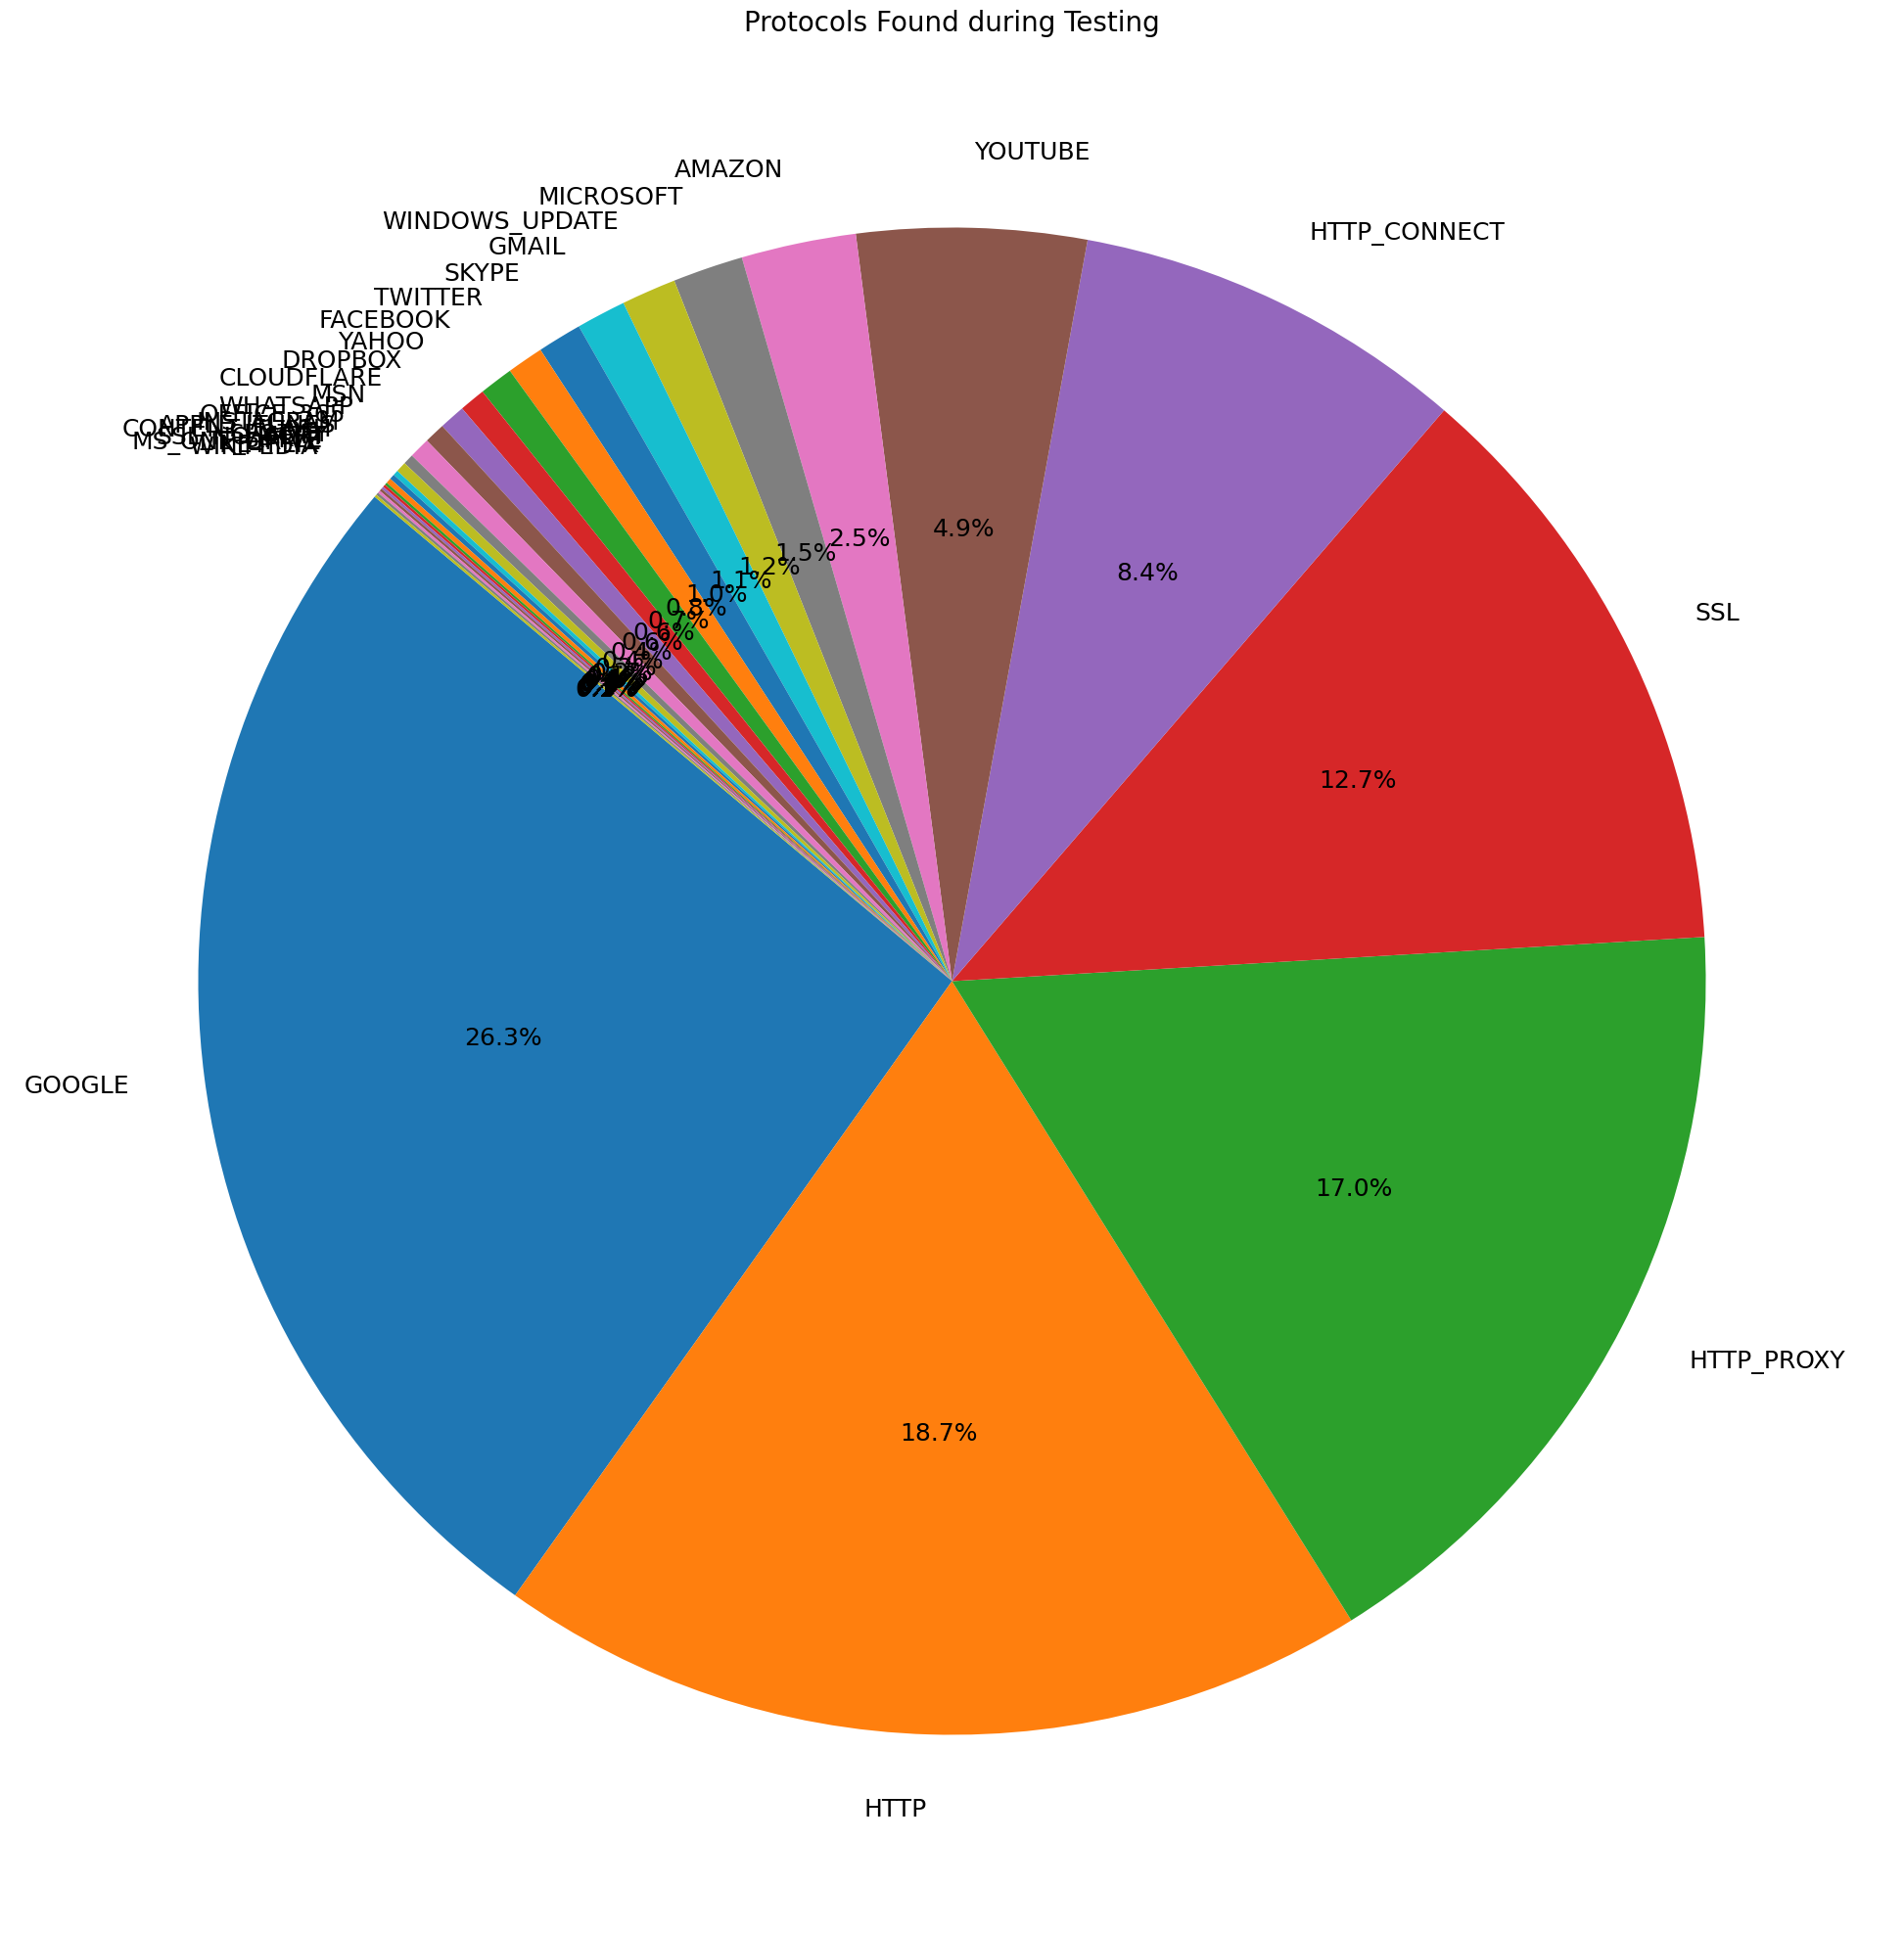

In [14]:
# Create a pie chart
plt.figure(figsize=(25, 25))
plt.pie(traffic_counts.values, labels=traffic_counts.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize':18})
plt.title("Protocols Found during Testing", fontsize=20)
plt.show()

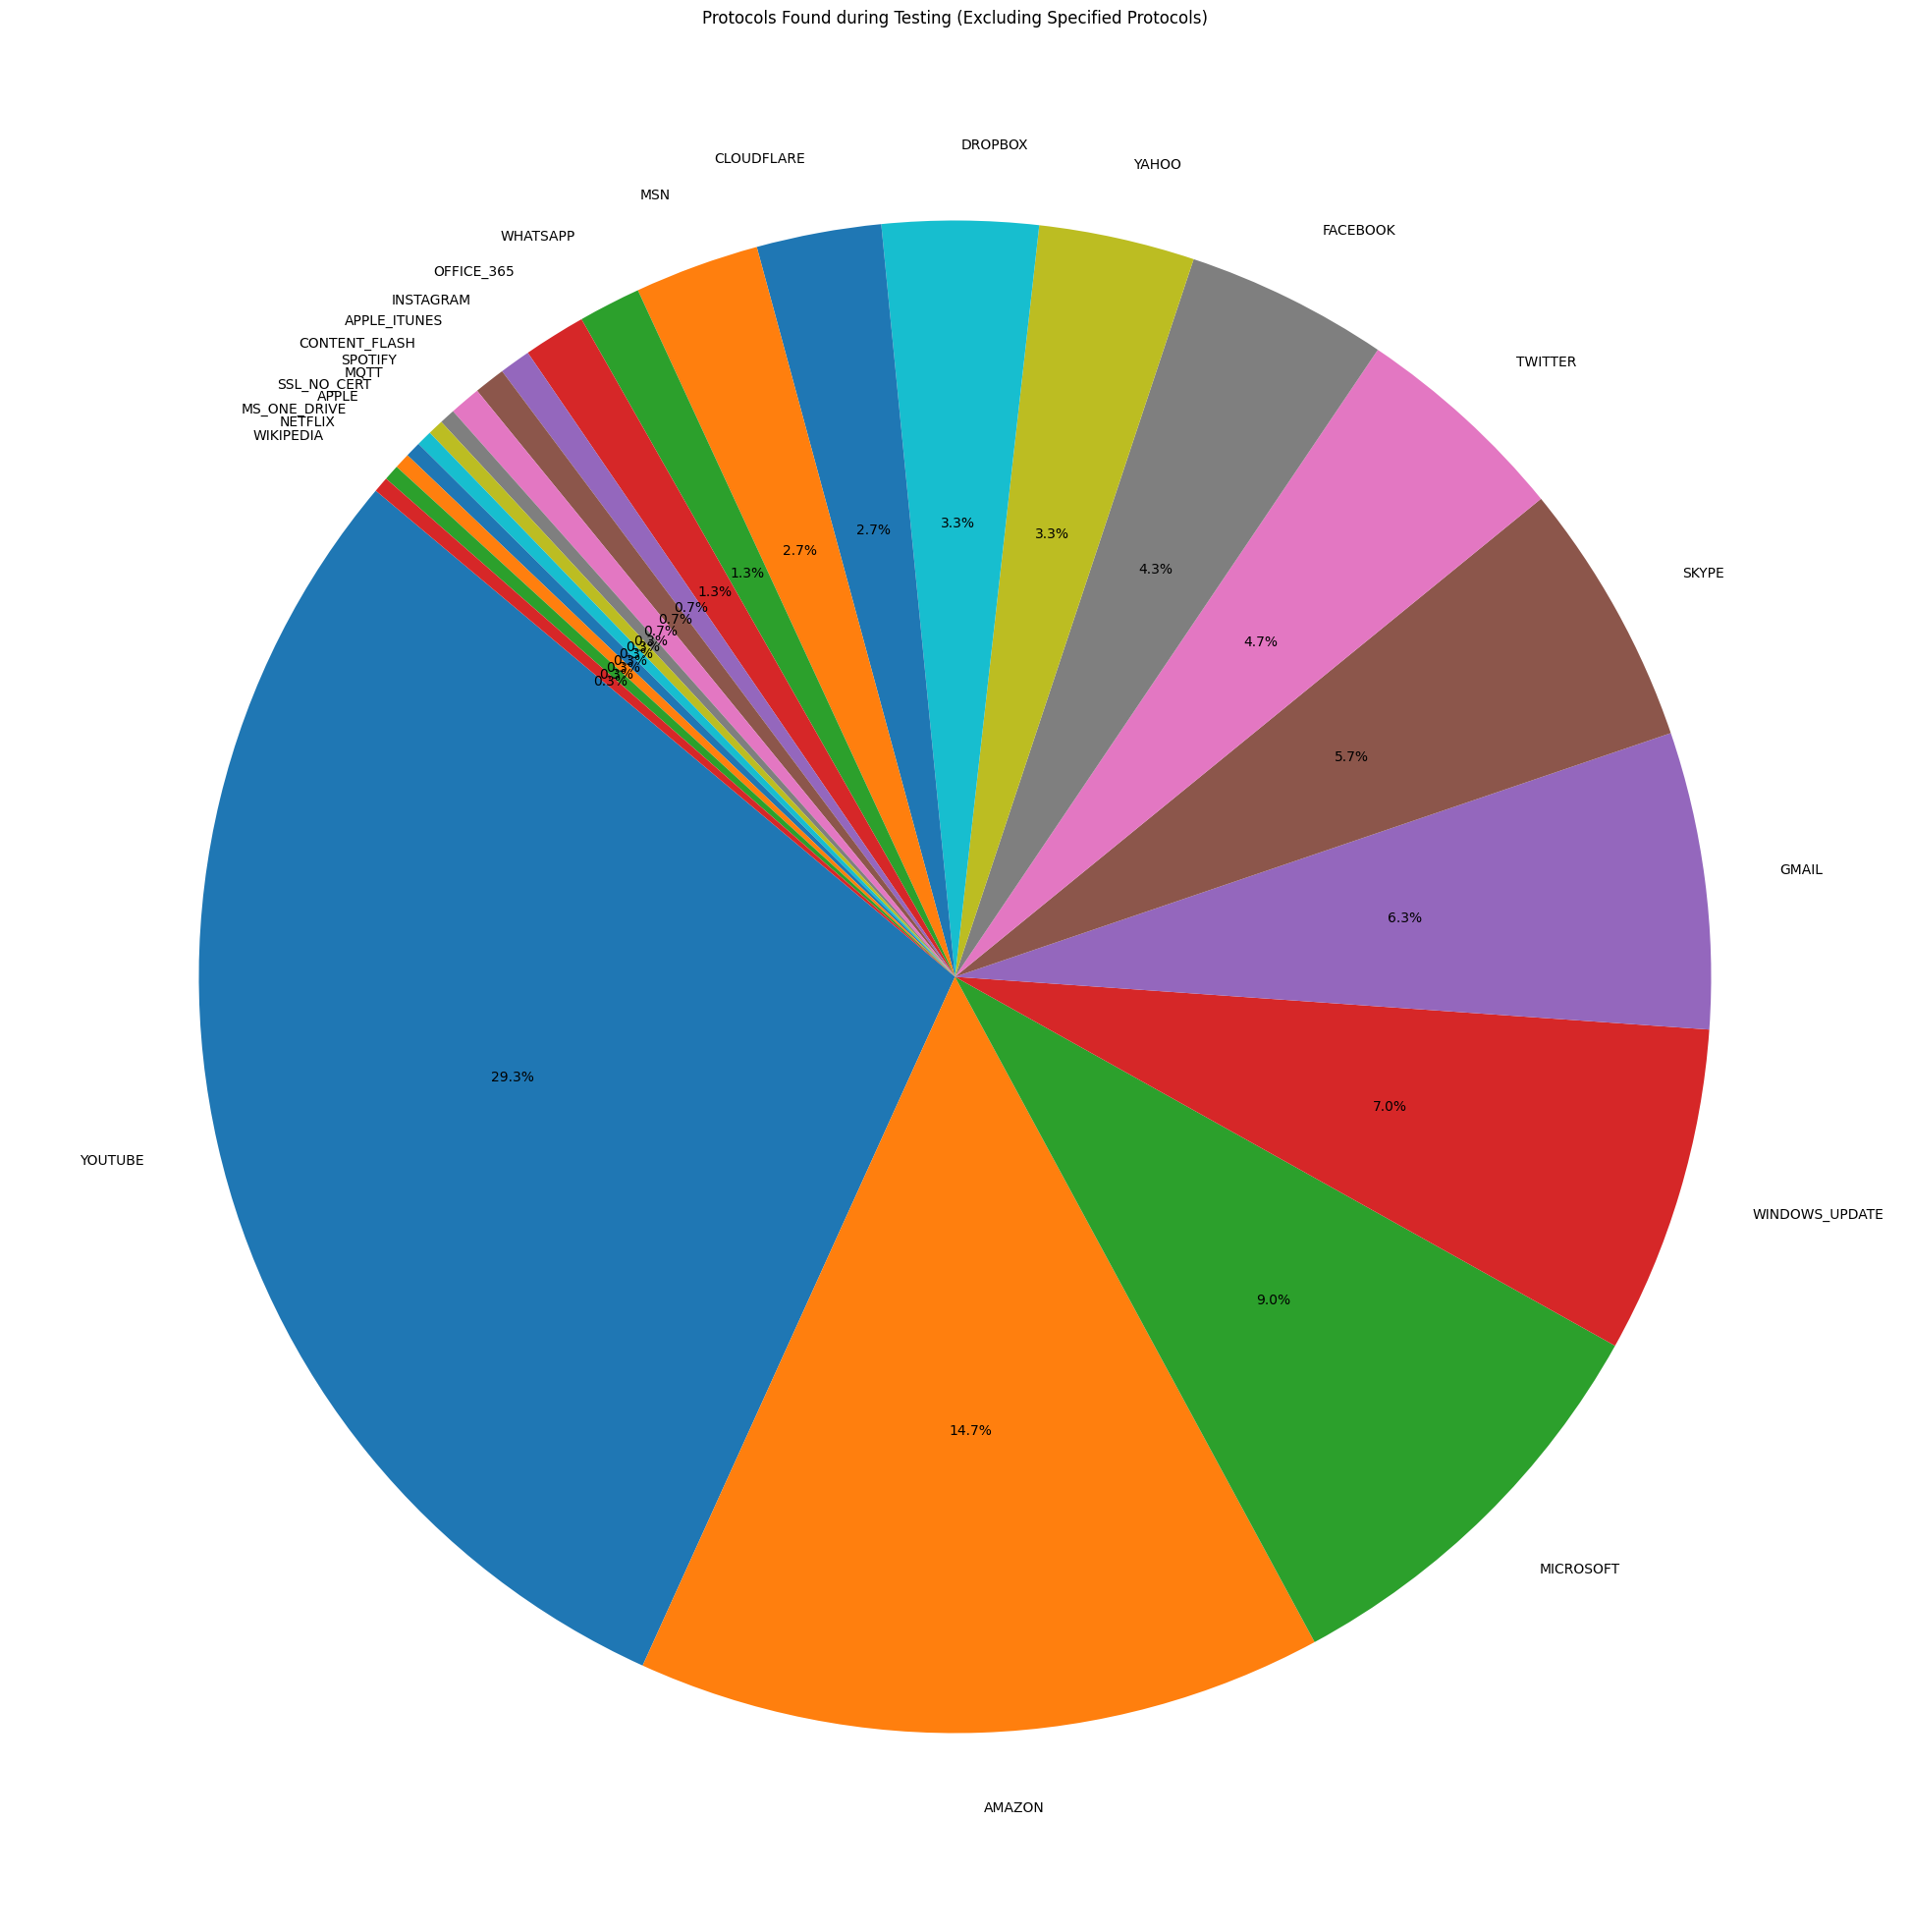

In [16]:
plt.figure(figsize=(25, 25))
plt.pie(traffic_counts_without_excluded.values, labels=traffic_counts_without_excluded.index, autopct='%1.1f%%', startangle=140)
plt.title("Protocols Found during Testing (Excluding Specified Protocols)")
plt.show()